## Import Libraries

In [2]:
import pandas as pd
import spacy
from textblob import TextBlob
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

## Loading Dataset

In [3]:
# Load your dataset
data_path = 'data_senti_TE.csv'
data2_path = 'data_senti_chevron.csv'
data = pd.read_csv(data_path)
data2 = pd.read_csv(data2_path)
# Combine TE and Chevron
combined_data = pd.concat([data, data2], ignore_index=True)

# Load NLP model
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Change the date to datetime
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

# Change the date to datetime for data of TE
data['Date'] = pd.to_datetime(data['Date'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-4-742959149d84>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  combined_data['Date'] = pd.to_datetime(combined_data['Date'])
<ipython-input-4-742959149d84>:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


## Find out named entities, sentiment, and tweet weights

In [5]:
# Define function that gets the keywords
def get_named_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ not in {'CARDINAL', 'PERCENT', 'ORDINAL'}]

# Calculate the tweet weights
def calculate_tweet_weights(data):
    data['rank_sum'] = (data[['X Likes', 'X reposts', 'X followers', 'Impressions', 'Estimated reach']]
                        .rank(method='max').sum(axis=1))

    # Normalize the rank sum
    data['normalized_rank'] = data['rank_sum'] / data['rank_sum'].sum()
    data['weight'] = data['normalized_rank'] / data['normalized_rank'].max()
    return data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Get the keywords of TE and combined datasets
#data['Named entities'] = data['Text'].apply(get_named_entities)
#combined_data['Named entities'] = combined_data['Text'].apply(get_named_entities)

# Calculate the weights of combined data
combined_data = calculate_tweet_weights(combined_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0.1,Unnamed: 0,Date,Text,Tone,X Likes,X reposts,X followers,Impressions,Estimated reach,Compound_Sentiment_Score,Sentiment,Queries
0,0,0,2023-02-28 23:38:05,Europe is increasingly burning coal and wood b...,neutral,0,0,3435,3435,274,-0.776049,negative,TotalEnergies
1,1,1,2023-02-28 23:34:50,A case to keep an eye on.,neutral,0,0,8043,8043,643,0.157533,neutral,TotalEnergies
2,2,2,2023-02-28 23:07:48,Relentless public mobilization is making the b...,negative,0,0,107,107,8,-0.626536,negative,TotalEnergies
3,3,3,2023-02-28 23:05:21,"We shall NOT say silent, we shall NOT just loo...",neutral,0,0,693,693,55,-0.611185,negative,TotalEnergies
4,4,4,2023-02-28 22:58:01,"Court in France has described as ""inadmissible...",negative,0,1,650,951,76,-0.599086,negative,TotalEnergies


In [8]:
combined_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0.1,Unnamed: 0,Date,Text,Tone,X Likes,X reposts,X followers,Impressions,Estimated reach,Compound_Sentiment_Score,Sentiment,Queries,rank_sum,normalized_rank,weight
0,0.0,0,2023-02-28 23:38:05,Europe is increasingly burning coal and wood b...,neutral,0,0,3435,3435,274,-0.776049,negative,TotalEnergies,157813.0,0.000023,0.663526
1,1.0,1,2023-02-28 23:34:50,A case to keep an eye on.,neutral,0,0,8043,8043,643,0.157533,neutral,TotalEnergies,172123.0,0.000026,0.723692
2,2.0,2,2023-02-28 23:07:48,Relentless public mobilization is making the b...,negative,0,0,107,107,8,-0.626536,negative,TotalEnergies,88415.0,0.000013,0.371742
3,3.0,3,2023-02-28 23:05:21,"We shall NOT say silent, we shall NOT just loo...",neutral,0,0,693,693,55,-0.611185,negative,TotalEnergies,121277.0,0.000018,0.509910
4,4.0,4,2023-02-28 22:58:01,"Court in France has described as ""inadmissible...",negative,0,1,650,951,76,-0.599086,negative,TotalEnergies,130320.0,0.000019,0.547931


Find out the keywords for TE

In [ ]:
from collections import Counter
import re

def extract_entities_and_calculate_support(data, min_support=0.03):
    all_entities = []
    excluded_patterns = ["TotalEnergies", "@TotalEnergies", "#TotalEnergies"]

    # Create a regex pattern to match any of the excluded entities, case-insensitively
    excluded_regex = re.compile('|'.join(re.escape(pattern) for pattern in excluded_patterns), re.IGNORECASE)

    for entities in data['Named entities']:
        filtered_entities = [entity for entity in entities if not excluded_regex.search(entity)]
        all_entities.extend(filtered_entities)

    entity_counts = Counter(all_entities)
    total_tweets = len(data)

    # Calculate support and apply the threshold
    entity_support = {entity: count / total_tweets for entity, count in entity_counts.items() if (count / total_tweets) >= min_support}

    return entity_support

min_support = 0.02
freq_set = extract_entities_and_calculate_support(data, min_support)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
freq_set

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Uganda': 0.035368671501452724,
 'France': 0.04532039989933884,
 'French': 0.05373933334858502,
 'Africa': 0.02498226990917618,
 'LNG': 0.051062661572601864,
 'Shell': 0.03244034682345405,
 'Nigeria': 0.02335796481434879}

Reputation score for the frequent entities

In [ ]:
def calculate_entity_reputation(data, entity_support):
    entity_reputation = {}

    for entity, support in entity_support.items():
        total_sentiment = 0

        # Filter tweets that contain the entity
        for _, tweet in data.iterrows():
            if entity in tweet['Named entities']:
                sentiment = tweet['Compound_Sentiment_Score']
                total_sentiment += sentiment * support  # Weight sentiment by support of the entity

        entity_reputation[entity] = total_sentiment / support if support > 0 else 0

    return entity_reputation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
entity_sentiment = calculate_entity_reputation(data, freq_set)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
entity_sentiment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Uganda': -344.6068099096885,
 'France': -45.7785993737634,
 'French': -222.39772250747842,
 'Africa': -231.99947395431798,
 'LNG': 173.0239005959595,
 'Shell': -6.578427716856834,
 'Nigeria': -83.40037179342474}

### Overall reputation score (and moving averages)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_reputation_scores(data, query_name,window=7):
    overall_posk = 0
    overall_negk = 0
    overall_total_weight = 0

    daily_reputation = []
    grouped = data.groupby(data['Date'].dt.date)

    for date, group in grouped:
        daily_posk = 0
        daily_negk = 0
        daily_total_weight = 0

        for _, tweet in group.iterrows():
            if pd.notna(tweet['Queries']) and query_name.lower() in tweet['Queries'].lower():
                sentiment = tweet['Compound_Sentiment_Score']
                weight = tweet['weight']

                # Separate positive and negative sentiments
                if sentiment >= 0:
                    daily_posk += sentiment * weight
                    overall_posk += sentiment * weight
                else:
                    daily_negk += abs(sentiment) * weight
                    overall_negk += abs(sentiment) * weight

                daily_total_weight += weight
                overall_total_weight += weight


        if daily_posk + daily_negk > 0:
            daily_reputation.append((date, (daily_posk - daily_negk) / (daily_posk + daily_negk)))
        else:
            daily_reputation.append((date, 0))

    if overall_posk + overall_negk > 0:
        overall_reputation = (overall_posk - overall_negk) / (overall_posk + overall_negk)
    else:
        overall_reputation = 0

    daily_reputation_df = pd.DataFrame(daily_reputation, columns=['Date', 'Reputation'])
    daily_reputation_df['Smoothed Reputation'] = daily_reputation_df['Reputation'].rolling(window=window).mean()

    return overall_reputation, daily_reputation_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
totalenergies_overall_reputation, totalenergies_daily_reputation = calculate_reputation_scores(combined_data, 'TotalEnergies')
chevron_overall_reputation, chevron_daily_reputation = calculate_reputation_scores(combined_data, 'Chevron')

print(f"Overall Reputation Score for TotalEnergies: {totalenergies_overall_reputation:.2f}")
print(f"Overall Reputation Score for Chevron: {chevron_overall_reputation:.2f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Overall Reputation Score for TotalEnergies: 0.02
Overall Reputation Score for Chevron: -0.34


In [11]:
totalenergies_daily_reputation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Reputation,Smoothed Reputation
0,2023-01-01,-0.106264,NaN
1,2023-01-02,0.596436,NaN
2,2023-01-03,-0.168434,NaN
3,2023-01-04,0.147353,NaN
4,2023-01-05,0.379973,NaN
...,...,...,...
509,2024-05-25,-0.367533,-0.351913
510,2024-05-26,0.000000,-0.257753
511,2024-05-27,0.000000,-0.199632
512,2024-05-28,0.000000,-0.116545


In [12]:
# Step 2: Extract the date part (ignore the time part)
data['Date_Only'] = data['Date'].dt.date

# Step 3: Group by the date part and calculate the mean of 'Compound_Sentiment_Score'
average_scores = data.groupby('Date_Only')['Compound_Sentiment_Score'].mean().reset_index()

# Step 4: Rename columns for clarity (optional)
average_scores.columns = ['Date', 'Average_Compound_Sentiment_Score']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
merged_df = pd.merge(totalenergies_daily_reputation, average_scores, on='Date', how='left')

# Define the scaling function
def scale_to_100(value):
    return ((value + 1) / 2) * 100

# Apply the function to the 'Reputation' and 'Average_Compound_Sentiment_Score' columns
merged_df['Scaled_Reputation'] = merged_df['Reputation'].apply(scale_to_100)
merged_df['Scaled_Average_Compound_Sentiment_Score'] = merged_df['Average_Compound_Sentiment_Score'].apply(scale_to_100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
merged_df = merged_df.iloc[:-4]
merged_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Reputation,Smoothed Reputation,Average_Compound_Sentiment_Score,Scaled_Reputation,Scaled_Average_Compound_Sentiment_Score
0,2023-01-01,-0.106264,NaN,-0.122199,44.686823,43.890051
1,2023-01-02,0.596436,NaN,0.203132,79.821805,60.156580
2,2023-01-03,-0.168434,NaN,-0.041463,41.578317,47.926848
3,2023-01-04,0.147353,NaN,0.033762,57.367672,51.688112
4,2023-01-05,0.379973,NaN,0.110439,68.998648,55.521933
...,...,...,...,...,...,...
505,2024-05-21,-0.581609,-0.192930,-0.291808,20.919527,35.409609
506,2024-05-22,-0.143343,-0.227891,-0.094131,42.832834,45.293467
507,2024-05-23,-0.176531,-0.298374,-0.084321,41.173452,45.783928
508,2024-05-24,-0.128406,-0.303515,-0.102360,43.579691,44.881975


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


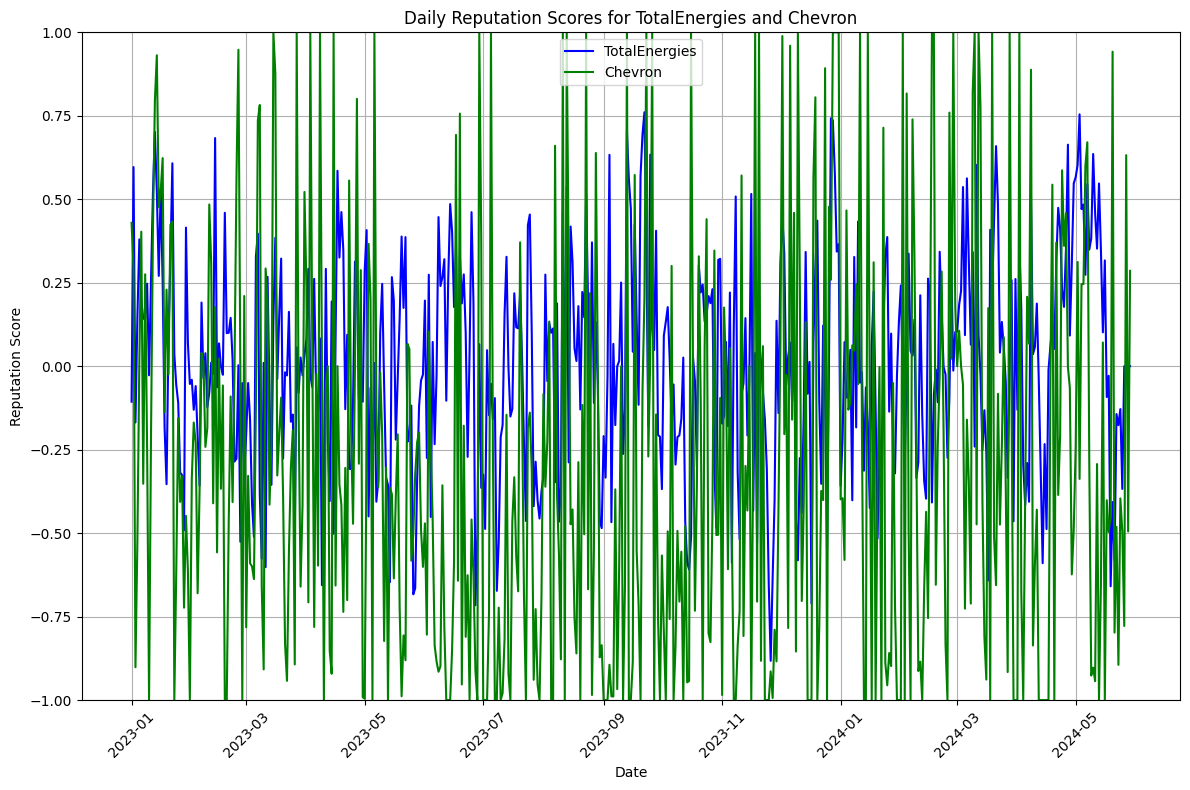

In [15]:
# Plot the daily reputation scores
plt.figure(figsize=(12, 8))
plt.plot(totalenergies_daily_reputation['Date'], totalenergies_daily_reputation['Reputation'], label='TotalEnergies', color='blue')
plt.plot(chevron_daily_reputation['Date'], chevron_daily_reputation['Reputation'], label='Chevron', color='green')
plt.xlabel('Date')
plt.ylabel('Reputation Score')
plt.title('Daily Reputation Scores for TotalEnergies and Chevron')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(-1, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


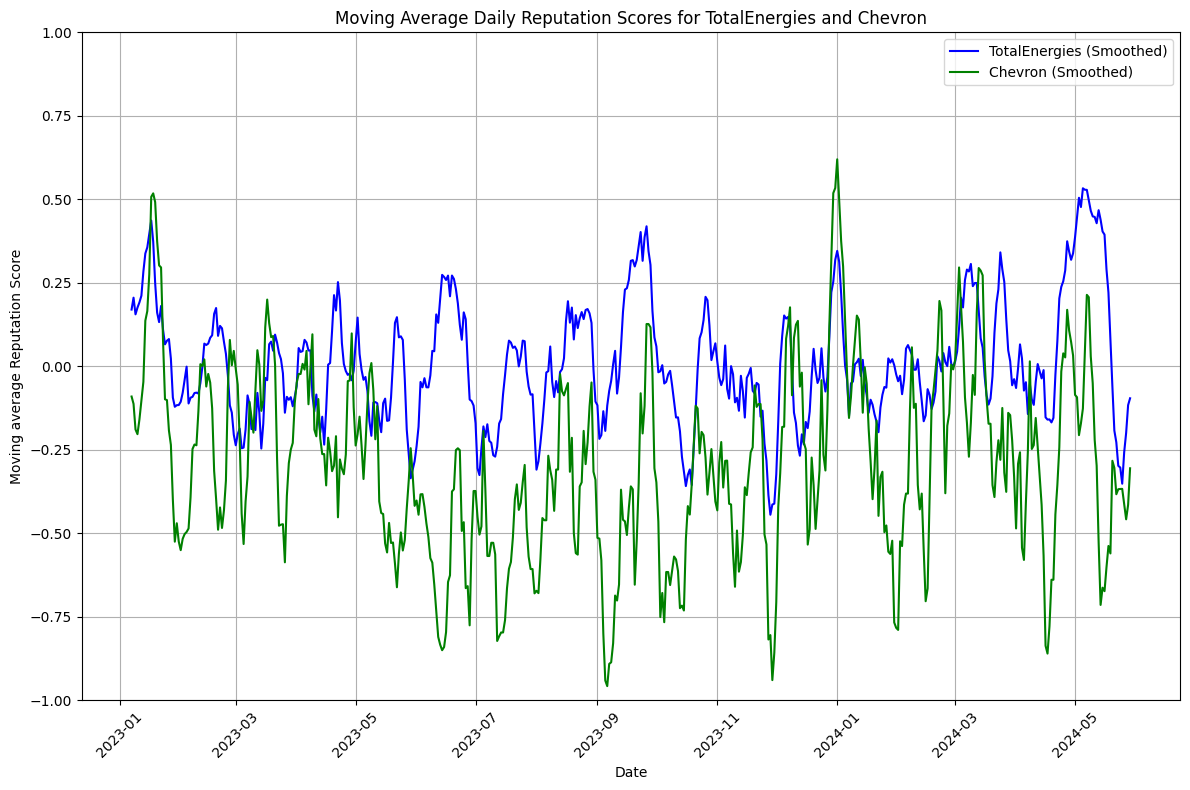

In [16]:
# Plot the moving average reputation scores
plt.figure(figsize=(12, 8))
plt.plot(totalenergies_daily_reputation['Date'], totalenergies_daily_reputation['Smoothed Reputation'], label='TotalEnergies (Smoothed)', color='blue')
plt.plot(chevron_daily_reputation['Date'], chevron_daily_reputation['Smoothed Reputation'], label='Chevron (Smoothed)', color='green')
plt.xlabel('Date')
plt.ylabel('Moving average Reputation Score')
plt.title('Moving Average Daily Reputation Scores for TotalEnergies and Chevron')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(-1, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


## Reputation Score properties and Stock Correlation

In [ ]:
merged_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


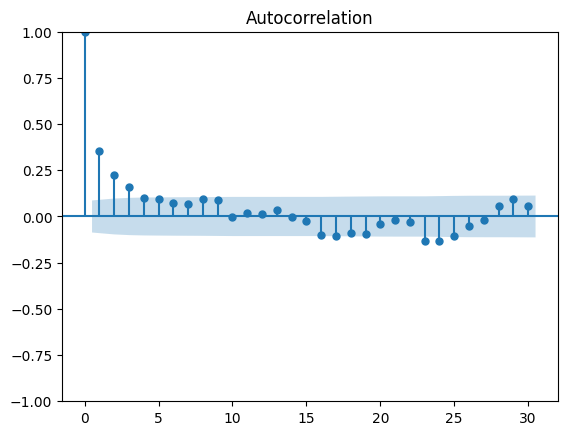

In [17]:
# prompt: i wanna used this example code for the reputation column of merged_df
# from statsmodels.graphics.tsaplots import plot_acf
# plot_acf(aggregated_scores, lags=30)
# plt.show()

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(merged_df['Reputation'], lags=30)
plt.show()


In [18]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(merged_df['Reputation'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.405658
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Combine with stock data

In [20]:
import yfinance as yf

start_date = '2023-01-01'
end_date = '2024-05-25'
stock = yf.download('TTE', start=start_date, end=end_date)['Adj Close']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[*********************100%%**********************]  1 of 1 completed


In [22]:
import numpy as np
stock_log = np.log(stock)
stock_returns = stock_log.diff().fillna(0) * 100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
stock_returns = stock_returns[1:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
stock_returns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Date
2023-01-04   -0.587658
2023-01-05    0.049104
2023-01-06    1.171323
2023-01-09    0.644846
2023-01-10    1.467569
                ...   
2024-05-20   -1.030017
2024-05-21   -0.817808
2024-05-22   -1.939349
2024-05-23    0.042561
2024-05-24    1.436437
Name: Adj Close, Length: 350, dtype: float64

In [26]:
merged_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Reputation,Smoothed Reputation,Average_Compound_Sentiment_Score,Scaled_Reputation,Scaled_Average_Compound_Sentiment_Score
0,2023-01-01,-0.106264,NaN,-0.122199,44.686823,43.890051
1,2023-01-02,0.596436,NaN,0.203132,79.821805,60.156580
2,2023-01-03,-0.168434,NaN,-0.041463,41.578317,47.926848
3,2023-01-04,0.147353,NaN,0.033762,57.367672,51.688112
4,2023-01-05,0.379973,NaN,0.110439,68.998648,55.521933


In [27]:
merged_df['Reputation']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0     -0.106264
1      0.596436
2     -0.168434
3      0.147353
4      0.379973
         ...   
505   -0.581609
506   -0.143343
507   -0.176531
508   -0.128406
509   -0.367533
Name: Reputation, Length: 510, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


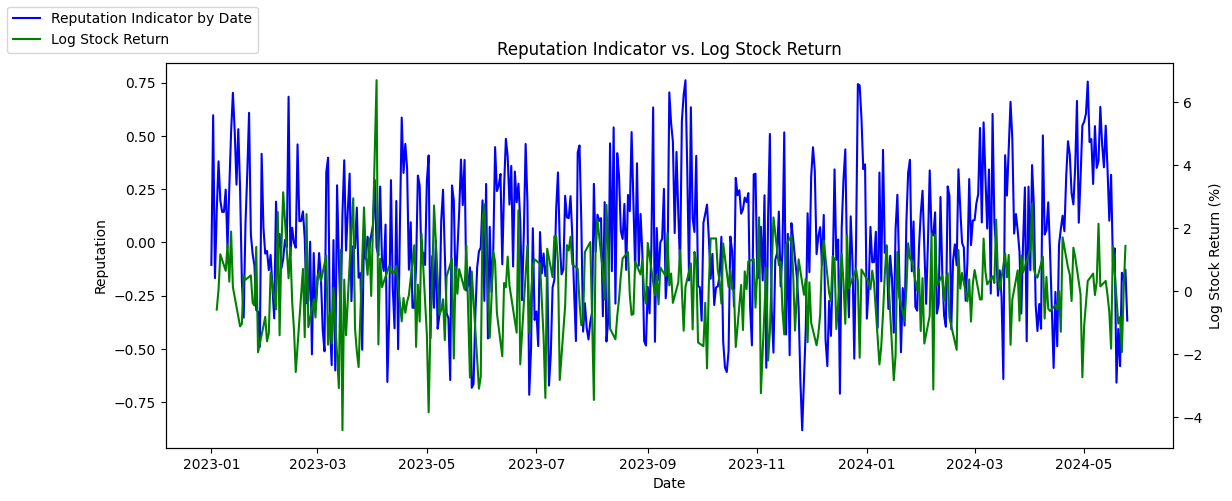

In [34]:
# prompt: I want to plot the Reputation column of merged_df againts the log stock return by date, take this code as an example, but it needs modification to take into account the Date of the reputation indicator which is date columns in merged_df
# fig, ax1 = plt.subplots(figsize=(10, 5))
# ax1.plot(merged_df['Reputation'], label='Reputation Indicator by Date', color='b')
# ax1.set_xlabel('Date')
# ax1.set_ylabel

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(13, 5))
ax1.plot(merged_df['Date'], merged_df['Reputation'], label='Reputation Indicator by Date', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Reputation')
ax2 = ax1.twinx()
ax2.plot(stock_returns.index, stock_returns, label='Log Stock Return', color='g')
ax2.set_ylabel('Log Stock Return (%)')
fig.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Reputation Indicator vs. Log Stock Return')
plt.show()


In [38]:
# prompt: i wanna do this but is giving error:
# merged_df2 = pd.merge(merged_df, stock_returns, on='Date', how='left')

merged_df2 = merged_df.set_index('Date').join(stock_returns, how='left')
merged_df2 = merged_df2[['Reputation', 'Adj Close']]
merged_df2 = merged_df2.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
merged_df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Reputation,Adj Close
Date,,
2023-01-04,0.147353,-0.587658
2023-01-05,0.379973,0.049104
2023-01-06,0.196336,1.171323
2023-01-09,0.247185,0.644846
2023-01-10,-0.027254,1.467569
...,...,...
2024-05-20,-0.406849,-1.030017
2024-05-21,-0.581609,-0.817808
2024-05-22,-0.143343,-1.939349


In [40]:
from statsmodels.tsa.api import VAR

model3 = VAR(merged_df2)
fitted_model3 = model3.fit(1)

print(fitted_model3.summary())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 10, Jun, 2024
Time:                     10:11:35
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.86232
Nobs:                     349.000    HQIC:                  -1.90221
Log likelihood:          -647.880    FPE:                   0.145353
AIC:                     -1.92859    Det(Omega_mle):        0.142886
--------------------------------------------------------------------
Results for equation Reputation
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.027772         0.015129            1.836           0.066
L1.Reputation         0.362164         0.050158            7.221           0.000
L1.Adj Close          0.015509         0.011078        

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [41]:
# Test if Daily_Compound_Score Granger-causes Log_Stock_Return
granger_test_1 = fitted_model3.test_causality('Adj Close', ['Reputation'], kind='f')
print(granger_test_1.summary())

# Test if Log_Stock_Return Granger-causes Reputation
granger_test_2 = fitted_model3.test_causality('Reputation', ['Adj Close'], kind='f')
print(granger_test_2.summary())



Granger causality F-test. H_0: Reputation does not Granger-cause Adj Close. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
        0.1343          3.855   0.714 (1, 692)
----------------------------------------------
Granger causality F-test. H_0: Adj Close does not Granger-cause Reputation. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
         1.960          3.855   0.162 (1, 692)
----------------------------------------------


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
